# 시계열

In [33]:
import numpy as np
import pandas as pd
import statsmodels as sm
import statsmodels.api as smapi
import matplotlib.pyplot as plt

In [34]:
data=sm.api.datasets.co2.load_pandas()
data

<class 'statsmodels.datasets.utils.Dataset'>

In [35]:
#시계열 데이터는 하나라서 y만 만들어주면 된다.

y=data.data
y

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


In [36]:
#y의 정보
y.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2284 entries, 1958-03-29 to 2001-12-29
Freq: W-SAT
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   co2     2225 non-null   float64
dtypes: float64(1)
memory usage: 35.7 KB


In [37]:
y['co2']

#아리마 모델울 쓰려면 시간 간격이 일정해야한다.

1958-03-29    316.1
1958-04-05    317.3
1958-04-12    317.6
1958-04-19    317.5
1958-04-26    316.4
              ...  
2001-12-01    370.3
2001-12-08    370.8
2001-12-15    371.2
2001-12-22    371.3
2001-12-29    371.5
Freq: W-SAT, Name: co2, Length: 2284, dtype: float64

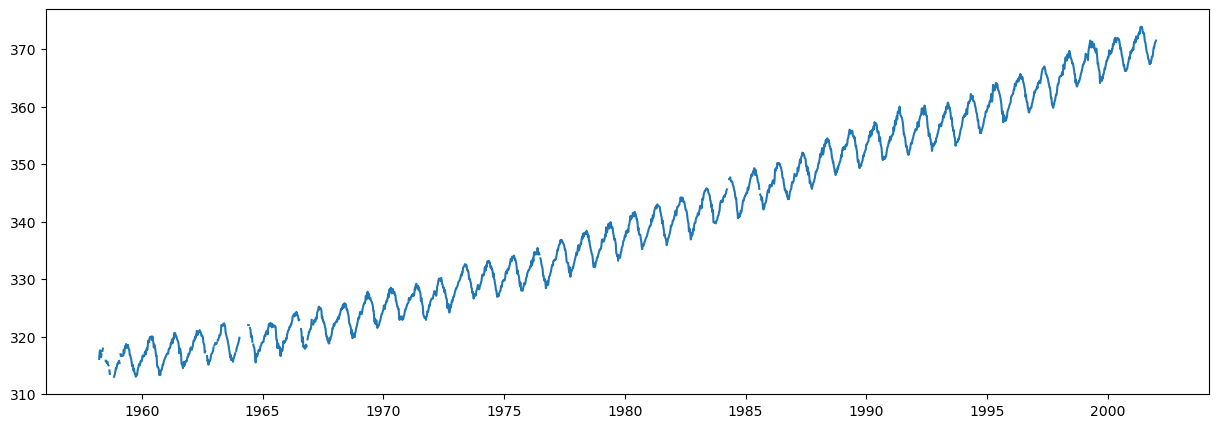

In [38]:
plt.figure(figsize=(15,5))
plt.plot(y['co2'])
plt.show()

<Axes: >

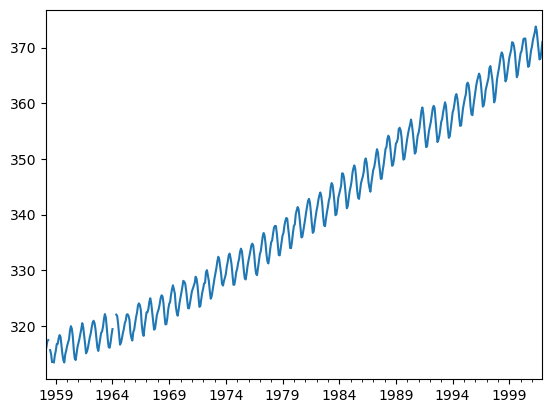

In [41]:
#결측치 보간간
#보간할 때는 보통 평균으로 보간한다.
# 끊어진 곳이 군데군데 보인다. -> 보간해준다. (interpolate)
# drop시키면 결측치 이후의 값이 앞으로 당겨져서 시간축에 안 맞게 되므로 리샘플링으로 보간해준다.
# 한 주 동안의 평균을 내는 건데, 일주일 내내 결측치가 있다면 마찬가지로 결측치가 생긴다.
# 데이터의 상세한 부분은 포기하고 평균 낼 기간을 길게 잡아서 한 달 동안의 평균을 내어 준다.


tmp=y['co2'].resample('M').mean()
tmp.plot()

<Axes: >

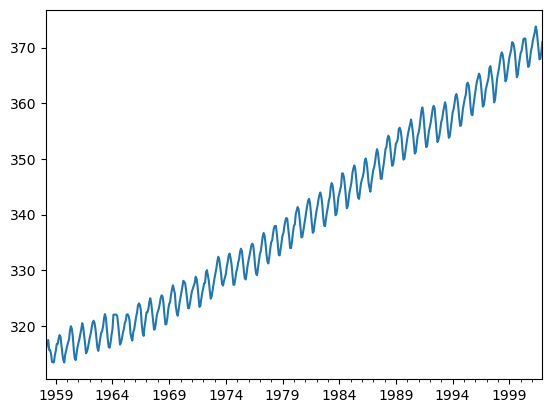

In [42]:
#결측치 채우기
tmp.bfill().plot()

<Axes: >

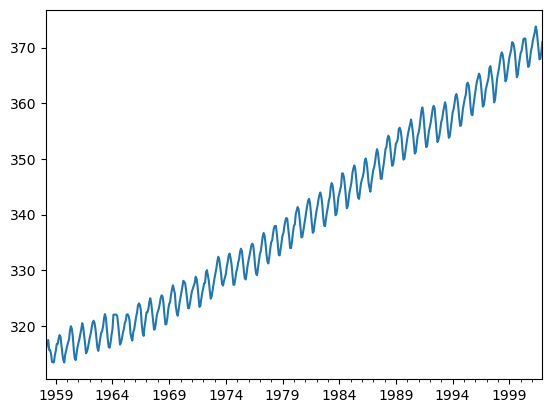

In [43]:
#bfill한 결과를 y에 담기

y=tmp.bfill()
y.plot()

In [44]:
y

1958-03-31    316.100000
1958-04-30    317.200000
1958-05-31    317.433333
1958-06-30    315.625000
1958-07-31    315.625000
                 ...    
2001-08-31    369.425000
2001-09-30    367.880000
2001-10-31    368.050000
2001-11-30    369.375000
2001-12-31    371.020000
Freq: M, Name: co2, Length: 526, dtype: float64

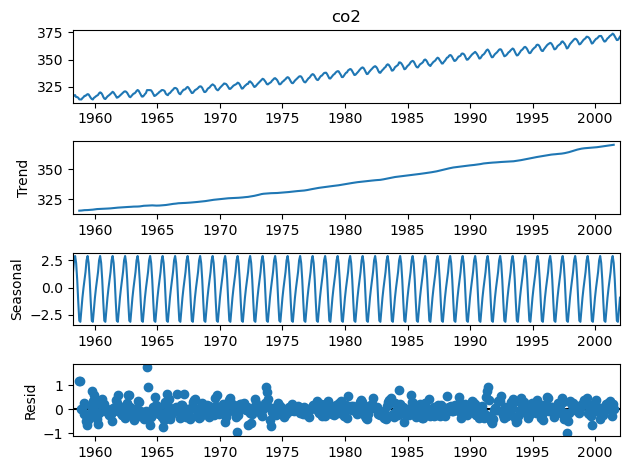

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose

result=seasonal_decompose(y, model='addictive') #, freq=) #모델은 가법모형, 승법모형 쓸지 고르는 것이다.#addictive 가법모형
result.plot()
plt.show()

C:\Users\PC\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


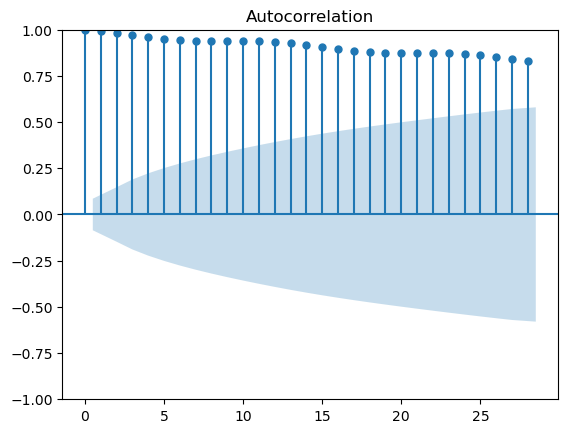

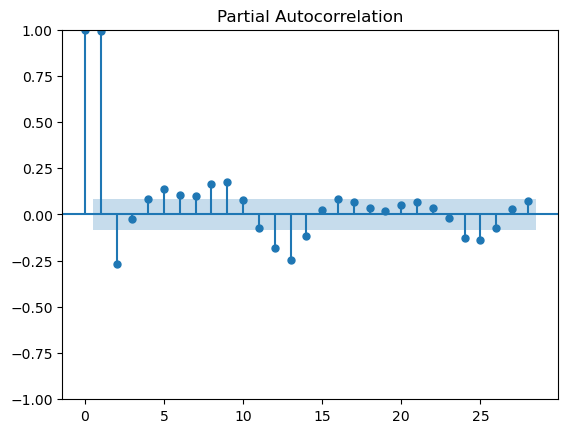

In [53]:
#ACF(자기상관함수)
#PACF

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(y)
plot_pacf(y)
plt.show()


# ACF: 과거의 데이터 값 y가 현재 데이터 y와 얼마나 상관이 있느냐?
# 현재와 25개월 전을 포개어서 비교해보니까 비슷하게 생겼군.
# 트렌드 때문에 과거로 가면 과거로 갈수록 조금 떨어진다.

# 반면에 PACF는 뚝 떨어진다. 뚝 떨어질 때 (-)도 반대 모양으로 상관이 있다는 뜻. 모양만 뒤집어진거지 똑같은 모양이다.
# 파란 밴드가 0으로 떨어지는지에 대한 경곗값인데 +랑 -방향 둘 다 기준선이 있다.
# 2일 때 (-) 방향으로 떨어졌지만 파란 밴드 바깥쪽이니까 컷오프가 아니라고 본다.
# 3일 때 컷오프가 일어났다고 본다. 컷오프가 일어나기 직전 p는 2이다.

# ARIMA 모델에서, Q=0으로 설정하여 MA모델을 쓰면 되겠다는 것을 알 수 있다.

### p<-pacf가 cut-off 일어나기 직전 2시차
### q<-acf가 점진적으로 감소하므로 0

In [ ]:
#몇 번 차분애햐하는지도 구해야한다.
#정상이 될 때까지 차분해야한다.

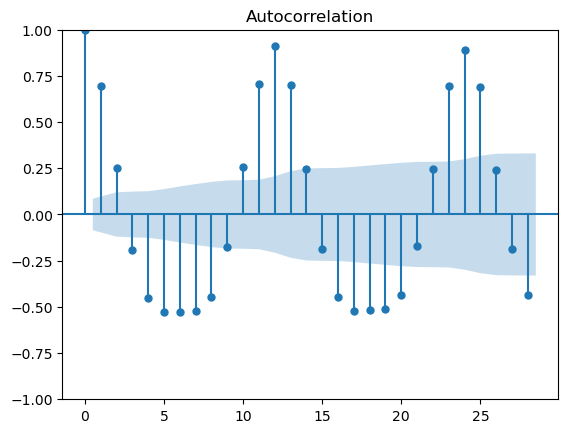

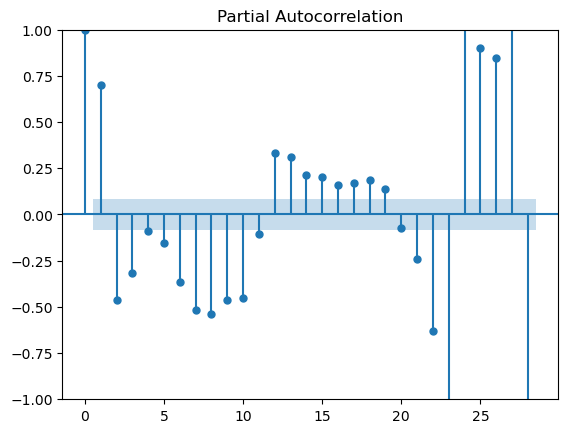

In [59]:
#차분
y_diff=y.diff()[1:] #period=n차 차분  

plot_acf(y_diff) #지수적으로 감소. 소몋하는 sim 함수 형태
plot_pacf(y_diff) #
plt.show()

#빠르게 컷오프되면 정상상태이다. 

C:\Users\PC\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


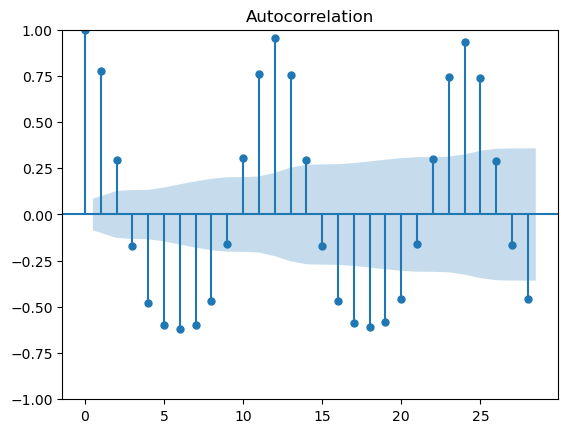

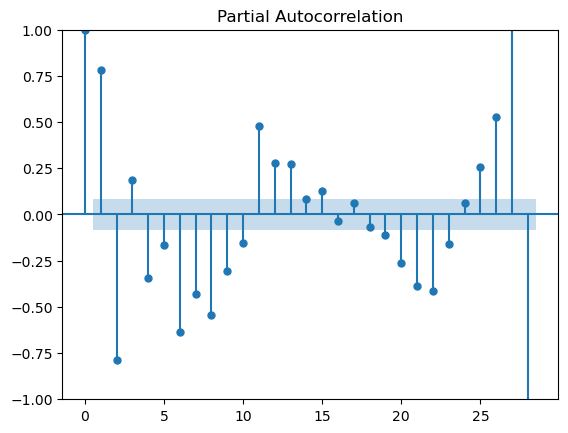

In [66]:
#2차 차분하기

y_diff=y.diff(periods=2)[2:] #period=n차 차분  #앞에 2는 빼야한다.

plot_acf(y_diff) #지수적으로 감소. 소몋하는 sim 함수 형태
plot_pacf(y_diff) 
plt.show()

#지수함수는 아무리 미분해도 커진다. 이미 안정화된 상태라서.
#컷오프가 안 일어나면 정상상태이다.

<Axes: >

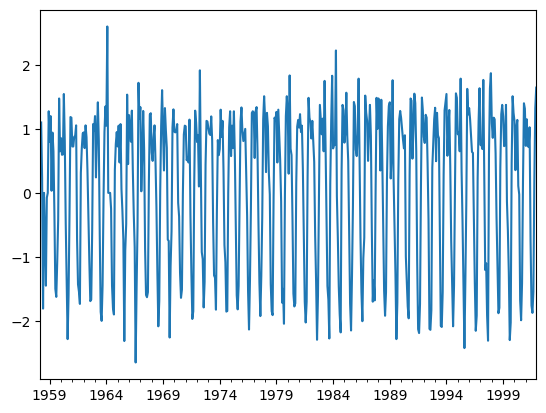

In [65]:
y_diff.plot()

### d <-1차 차분으로 정상화됨
### p,d,q=2,1,0

In [74]:
# 모든 하이퍼파라미터가 정해졌으므로 ARIMA 모델을 본격적으로 사용해 본다.
# 장기적인 예측 모델로는 쓸 수 없다. 내일이나 다음 주 정도가 어떻게 될지. 그 이후는 알 수 없다.

from statsmodels.tsa.arima.model import ARIMA

arima = ARIMA(y, order=(2, 1, 0))#p,d,q
arima_result=arima.fit()

#order-> tuple형태로 p,d,q 대로 넣어주면 된다.
#애초에 생성때부터 데이터를 넣어줘야한다.

In [76]:
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    co2   No. Observations:                  526
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -599.722
Date:                Mon, 19 Jun 2023   AIC                           1205.443
Time:                        15:06:00   BIC                           1218.233
Sample:                    03-31-1958   HQIC                          1210.451
                         - 12-31-2001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0224      0.044     23.454      0.000       0.937       1.108
ar.L2         -0.4589      0.043    -10.666      0.000      -0.543      -0.375
sigma2         0.5738      0.039     14.761      0.000       0.498       0.650
===================================================================================
Ljung-Box (L1) (Q):                  11.56   Jarque-Bera (JB):                 1.08
Prob(Q):                              0.00   Prob(JB):                         0.58
Heteroskedasticity (H):               0.83   Skew:                             0.10
Prob(H) (two-sided):                  0.21   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

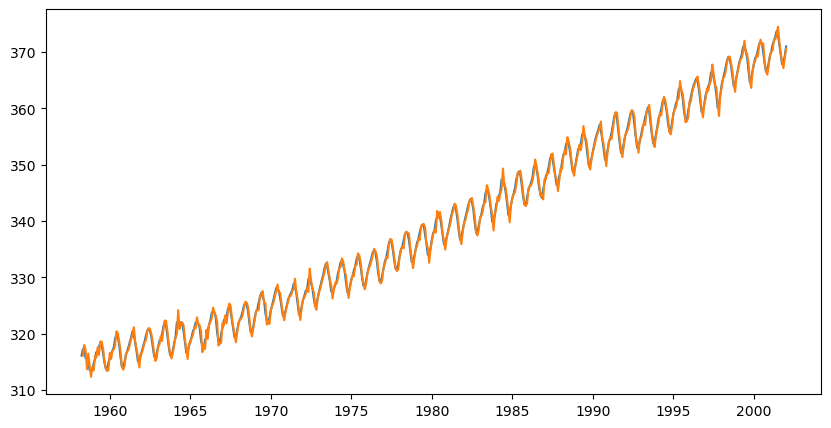

In [79]:
p=arima_result.predict()


plt.figure(figsize=(10,5))
plt.plot(y)
plt.plot(p[1:])
plt.show()

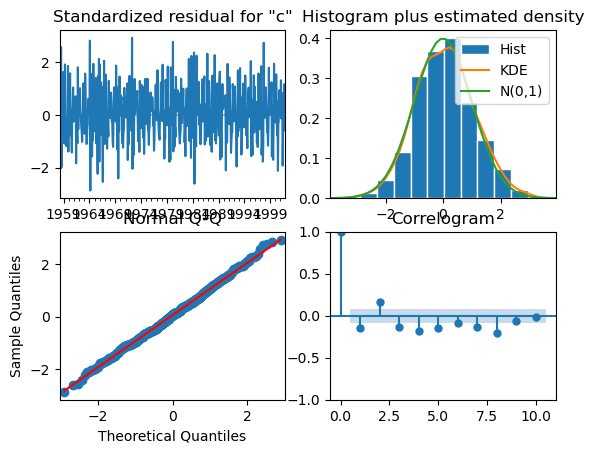

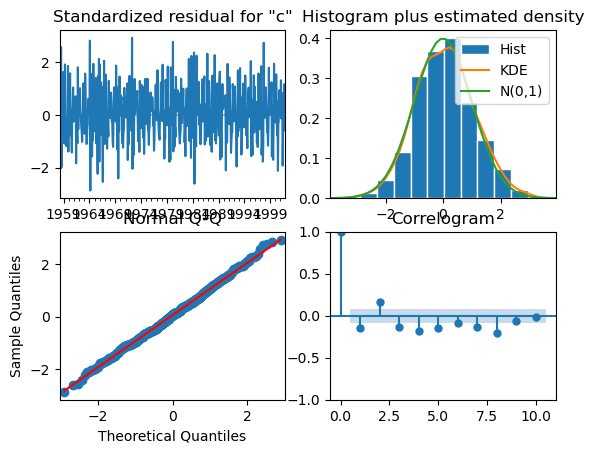

In [80]:
#모델 성능확인하기기

arima_result.plot_diagnostics()

#백색소음 모양이되면 fit이 잘 된 것이다.????



In [82]:
#예지(forecast:아직 일어나지 않은 것을 맞추는 것.)
#예측

arima_result.forecast(steps=1) #step은 기본값이 1이다.

2002-01-31    372.093734
Freq: M, dtype: float64

In [86]:
#12달, 10년치 

f=arima_result.forecast(steps=120)
f

2002-01-31    372.093734
2002-02-28    372.436558
2002-03-31    372.294284
2002-04-30    371.991494
2002-05-31    371.747220
                 ...    
2011-08-31    371.750253
2011-09-30    371.750253
2011-10-31    371.750253
2011-11-30    371.750253
2011-12-31    371.750253
Freq: M, Name: predicted_mean, Length: 120, dtype: float64

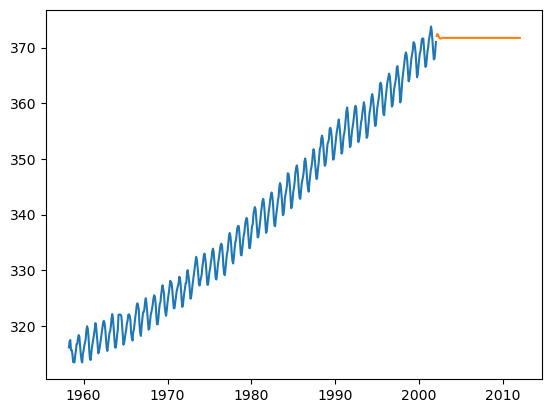

In [87]:
#예측해보기...예측하다 말았음.

plt.figure()
plt.plot(y)
plt.plot(f)
plt.show()

In [93]:
fore=arima_result.get_forecast(steps=120)


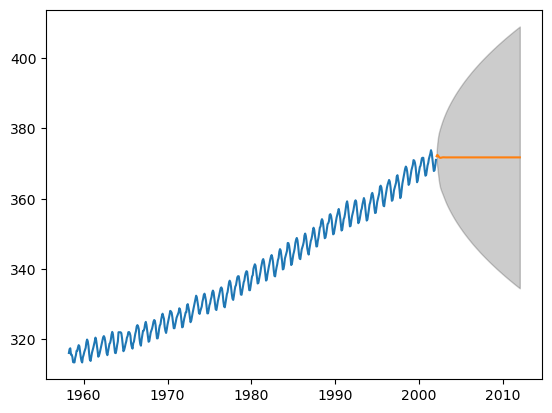

In [99]:
plt.figure()
plt.plot(y)
plt.plot(fore.predicted_mean)

#신뢰구간 자체
fore.conf_int()
ci=fore.conf_int() #ci=신뢰구간
plt.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='black', alpha=0.2)

plt.show()

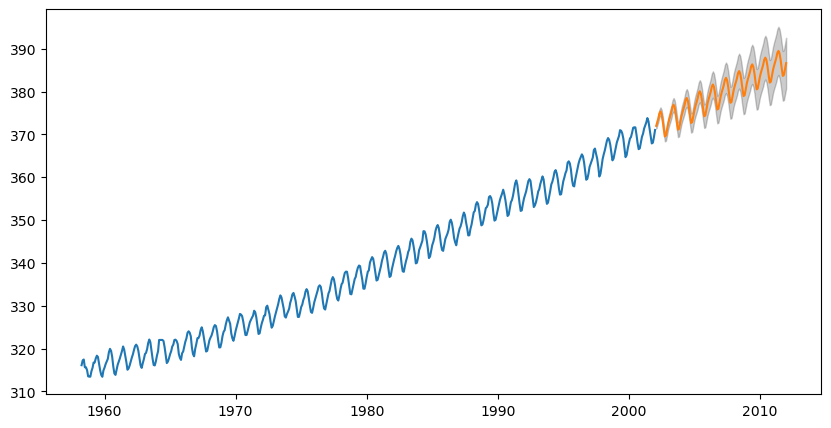

In [100]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
arima = SARIMAX(y, order=(1, 1, 1),
               seasonal_order=(1, 1, 1, 12),
               enforce_stationarity=False,
               enforce_inveribility=False)
arima_result = arima.fit()
fore = arima_result.get_forecast(steps=120)

plt.figure(figsize=(10, 5))
plt.plot(y)
plt.plot(fore.predicted_mean)
ci = fore.conf_int()
plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1],
                color='black', alpha=0.2)
plt.show()

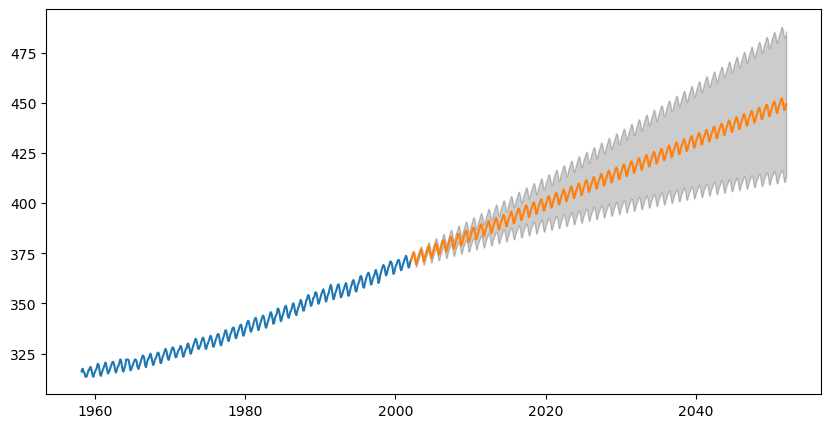

In [101]:
#2050년까지 예측하기. STEPS 600으로 바꾸면 된다.

from statsmodels.tsa.statespace.sarimax import SARIMAX
arima = SARIMAX(y, order=(1, 1, 1),
               seasonal_order=(1, 1, 1, 12),
               enforce_stationarity=False,
               enforce_inveribility=False)
arima_result = arima.fit()
fore = arima_result.get_forecast(steps=600)

plt.figure(figsize=(10, 5))
plt.plot(y)
plt.plot(fore.predicted_mean)
ci = fore.conf_int()
plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1],
                color='black', alpha=0.2)
plt.show()

정상성이란거는 시계열이 얼마나 일정하게 동일하게 반복이되느냐 하는 얘기였고
그럴수록 정상성을 띨수록 예측하기가 쉽겠죠 미래에 대해 과거랑 비슷한 양상으로 흘러가니깐
과거랑 비슷하게 반복될것이다 이렇게 예측하면 되겠죠 근데 현실에서 정상성을 띠는 시계열은 거의 존재하지 않아요.
정상시계열은 매우 제한적이다.
일단 고렇게 얘기드리고.
그래서 비정상시계열을 정상시계열로 변환하는 방법이 있긴해요 고거는 조금 이따가 얘기를 드릴게요

시계열에대한 평가지표들이 쭉쭉 있어요 똑같애요 그냥 똑같죠 ma rmse 저희 회귀모델 했던 지표들 그대로 쓰고있어요
p는 퍼센트예요 퍼센트
똑같애요 그래서 뭐 그냥 식은 다 똑같고 실제 시계열 값이랑 실제 그시점 t의 시계열값이랑 내가 예측한 시계열값이랑 비교해서
t를 1초부터 t까지 요렇게 시계열이 쭉 있을때 예측한 시계열이랑 둘이 딱 겹쳐보는거예요 둘이 얼마나 다른지 평균내는게 대부분의 방식
똑같은데 a는 그 차이를 절댓값을 취할 것이다. 뭐 rmse는 제곱한 다음에 루트 씌울것이다. p는 이거를 z로 나눠서 몇퍼센트인지
퍼센테이지를 볼거다 요런거 다 똑같습니다 결국은 차이를 평균낸다. 요런 지표들이 있어요
어떤 지표가 우수한지 해답은 없다. 그쳐 근데 일반적으로 rmse를 많이 씁니다. 계산이 젤 쉬워요 rmse가.
다른사람한테 보고서를 쓸 목적으로 평가지표를 계산한다 하면은 mae를 많이 기입을 해요 mae가 얼마나 틀린건지 스케일링이 원래 데이터랑
똑같게 나오니까 얼마나 틀린건지 알기쉽고 직관적으로 평가하기에는 rmse가 조금 더 용이합니다.

그래서..여기 또 같은얘기가 있는데
어 뭐 요렇게 생긴게 정상시계열이예요 평균도 일정하고 다음 진폭도 일정하고 여기도 여기도 일정하죠. 요정도 되면은 정상 시계열이다
비정상시계열은 요런애들 요런애들이 비정상시계열이죠? 추세도 다르고 진폭도 요긴 쪼꼬만데 요긴 이렇죠 대부분의 시계열은 아마도 요런 모양을 띨거예요. 그래서..
이 시계열을? 어떻게 예측할 것인가. 과거 시점의 데이터로 미래 데이터를 어떻게 예측할 것인가. 모델들이 여러가지가 있어요.
처음 나온게 오토리그레시브 모델. 우리나라말로 자기회귀 모델이라고 합니다. 자기회귀. 리그레시브 리그레션이 회귀모델이었죠.
근데 얘가 자기 자신을 과거 데이터로부터 자기자신을 예측한다고 해서 자기회귀. 그래서 오토리그레시브.라고합니다.

어떡하느냐? 요러케있대요 식이?
그래서 식을 천천히 보면은 예측하고자 하는 시점이예요 Yt가? 원래 회귀모델이었으면은 y말고 다른 x1, x2 요런 걸로 했는데. 신용카드 연체 할지 안할지
근데 자기회귀는? 과거의 자기자신. y를 예측하고 싶으니까 과거의 y로 현재의 y를 예측하는거죠?
Yt를 예측하고자 하면은 Yt-1 t-1이 바로직전 스텝이죠? 현재로부터 바로 직전스텝. 바로 직전스텝부터 그 직전스텝, 그직전스텝 해서...
p만큼 과거까지의 y를 싹 긁어와서 어떤 쎄타라고하는. 그게 그냥 회귀에서 w죠 가중치. 쎄타라고 하는 가중치를 곱한거의 합으로 나타낼 수 있다 라고 보는거예요. 과거 데이터들이 요렇게 쭉 있으면은 과거데이터들이 하나씩 조금쪼금씩 현재에 기여를 할 것이다.
현재 데이터가 과거 데이터들의 합으로 나타날 것이다. 그냥 합으로 나타나면은 값이 계속 커지니까 가중치가지고 조절을 해주는거죠.

나의 형태에 바로 어제가 영향을 많이 미치겠어요 1년전이 영향을 많이 미치겠어요? 어제가 많이 영향을 끼치겠죠.
t-1 그거의 가중치인 쎄타 1의 가중치가 더 클 것이고 과거로 갈수록 쎄타는 작아질 거예요. 그게 얼마나 작아지느냐는 데이터 따라 다르겠죠.
데이터가 일정한 주기를 따른다면은 
    ~~     ~~
 ~~ ~~  ~~ ~~
~~    ~~    ~~
그 해당 주기에 해당할때 그 해당 주기가 돌아올 때마다 쎄타는 커질거고 해당 주기가 반대방향 그니까
데이터가 요렇게 생겼다고 치면 요 시점을 알고싶어요. 근데 요까지 수집이 됐는데 요 다음시점이 궁금해요. 어디로 갈것인가. 그럼 요렇게
주기성을 띤다고 하면은 일단 요 과거보다는 현재랑 얼마 차이 안날 때 가중치가 더 클 것 같고 영향을 많이 미칠거고, 그다음에 얘랑 주기가 맞을때 그러니까 요시점, 요시점, 요시점마다 주기가 돌아올 때 마다 요때마다의 가중치가 요때보다 더 클거예요. 그니까 모델이 잘 적합이 됐다면, 잘 학습이 됐다면. 글서 과거 데이터의 합으로 현제 데이터를 알 수 있다고 하는 모델이 AR모델입니다. 오토 리그레시브 모델.

또 하나가 무빙 애버리지 모델. MA모델 이라고 있는데. 무빙 애버리지는 저희 예전에 시계열 데이터 추세성 보던 그 무빙애버리지랑은 다른 MA예요. 얘는 뭐 일단 수식에 무빙애버리지가 사용되긴해요 예전에 그 무빙애버리지가. 의미는 쪼금 다릅니다. 그래서 식 보면은 전체적인 구조는 똑같은데 이거 y가 아니고 지금 엡실론으로 돼있죠 지금. 3을 뒤집어놓은거 같습니다. 보통 오차 의미할때. 오차가 에러죠 에러. 영어로 에러죠? 에러랑 엡실론이랑 비슷하게 생겼다라고 해서 에러 얘기할때 보통 엡실론으로 써요. 지금 엡실론이 뭐냐. 어떻게 나온 값이냐 라고 하면?

t시점의 엡실론은 t시점의 y에서 그 이전까지의 평균이예요 평균? 평균. N분의 1 q분의1. n이 q죠지금. q분의 1이죠.
그 과거의 y를 다 평균을 내요. 내면은 과거의 y로부터 만들어진 추세가 있을 거예요. 그 추세랑 현재 y랑 얼마나 차이가 나느냐.
고거를 에러 t 엡실론 t라고 표현을 하는겁니다. 그쵸? 그 에러는 추세와의 에러다. 추세와의 차이다. 그래서
요 ma의 관점은 무엇이냐.
현재 y의 상태를 결정ㅈ짓는것은 이전의 y가 가졌던 오차들이 쌓이고 쌓여서 만들어진 것이다. 이전의 y가 가졌던 오차들이 모여서 만들어진 것이 현재 y라고 보는 것이 ma의 관점이다. 
좀 오래된 예능이긴 한데 가족오락관에 보면 헤드폰쓰고 차례대로 말 전달하면서 가죠 차례대로 가다가 하나둘씩 틀리기 시작해요. 끝까지 가면은 완전히 다르게되죠
일련의 과정을 보면 조금쪼금씩 틀린게 한글자 한글자씩 틀린게 쌓여서 마지막에 새로운말을 전혀 다른 말을 만들어내죠.
ma가 그 관점에서 보는거예요. 이전의 정보가 전달되면서 쌓인 에러들이 현재의 상태를 만든 것이다.

여기에 보면은 AR모델도 그렇고 MA모델도 그렇고. 각각 P라는 값. Q라는 값이 있어요. 그니까 P랑 Q는 얼마나 과거까지 볼 것이냐 라는건데. 그쵸? AR모델의 경우 t-1부터 t-p까지 본거잖아요? p만큼의 과거까지 보겠다. 요 AR모델을 만드실 때 얼마나 과거까지 볼지를 하이퍼 파라미터로 지정을 해주실 수 있죠. 그래서 p가 크면 클수록 먼 과거 까지의 데이터를 볼 수 있기 때문에 모델이 참고할 만한 자료가 더 많아지겠죠. 다만 p가 크면 클수록 요 모델의 항이 많아지기 때문에 모델의 복잡도는 올라갈 거예요. MA모델도 마찬가지예요 얘는 Q죠 q가 크면 클수록 더 과거의 데이터까지 볼 수 있을텐데 여기에 항이 많아지기때문에 모델의 복잡도는 더 올라갈 거예요. P랑 Q를 구하는게 중요합니다. 그래서 과거의 데이터면 과거의 데이터일수록 현재에 미치는 영향이 적어질 거잖아요? 영향이 적어질 거기때문에 영향이 적어지는 적절한 지점에서 P랑 Q를 끊어야겠죠. 영향이 적어졌는지 많아졌는지를 구별하는방법은 쪼오금이따가..

아르마라는 모델이 있어요 아르마(ARMA)오토 리그레시브 앤 무빙애버리지 이렇게 돼있어요. 두개의 모델을 합친거죠?
두개의 모델을 합쳤다는 말인데. 식도 보시면은 그냥 두개의 식을 합친거예요. 두개의 식을 합친겁니다.
그래서 현재 상태가 예측하고자하는 현재 상태가 과거의 상태에서 부터도 영향을 받고, 과거에 만들어진 오차로부터도 영향을 받는다. 둘 다로부터 영향을 받기 때문에 두개의 합으로 현재를 예측할 것이다. 두개 모두 반영을 할 것이다. 과거의 상태랑 과거의 오차 모두 반영을 해서 현재를 예측할 것이다 하는게 아르마 모델입니다. 그래서 똑같애요? 그냥 단순히 두개 합쳤다. 근데 얘는 하이퍼파라미터가 P랑 Q 두개가 있죠?
P랑 Q 두개가 있어서. 과거의 상태 AR부분이고 여기가 MA부분이예요. 식이 그렇죠? AR부분은 얼마나 과거까지 볼 것이냐? MA부분은 얼마나 과거까지 볼것이냐를 P랑 Q를 다르게해서 서로 상이하게 줄 수 있죠? 또 두개가 똑같은 시간을 과거까지 볼 필요는 없습니다. P랑 Q를 다르게 줘서 각각 다른 시간동안 볼 수 있게 할 수 있어요.

그 다음에 나오는게 오토리그레시브 인티그레이티드 무빙애버리지 모델이 있는데. 하나씩 뭐가 붙죠. 가운데 인티그레이티드가 뭐냐.
우리나라말로 하면 차분?미분? 얘긴데? 미분은 어떤 연속된 함수에 대해서 아니 차분은 똑같은 얘긴데? 스텝을 가진. 뚝뚝 끊어지는. 중간단계 데이터가 없는거예요. 1초 2초.. 0.1초 중간단계 데이터가 없는거예요. 고거를 차분. 구분하기 위해서 이름을 지은거고. 똑같은거예요. 미분은 어떤 시점에서의 기울기를 말하는거잖아요? 그쵸. x가 1만큼 변하는동안 y는 얼만큼 변하는지 그거에대한 이야기죠. 차분은 그냥 이전 시점하고 현재 시점하고 얼마나 차이가 나느냐 이거예요. 그럼 결국 미분값하고 똑같죠. t가 한스텝 이동하는 동안 y는 얼만큼 변했느냐. 미분이죠. 직전 시점이랑 현재 시점이랑 얼마나 차이가 나느냐. 똑같이 미분인데 그냥 단순히 연속되지 않아서. 구분하기위해서. 미분보다 구하기 쉬워요. 현재값에서 그냥 이전값 빼주면 돼요. 차분을 적용한 모델을 인티그레이티드 란 단어를 끼워서 아리마(ARIMA)라고 이름을 지었습니다. 아리마.

아리마 모델은 아르마 모델에 차분을 적용해 준 것인데. 요게 차분얘기죠?
그래서 그냥 똑같은 시계열. 자기자신을 직전이랑 현재랑 빼준거예요. 비틀어가지고 두개 서로 빼준게 차분. 오른쪽은 1차 차분. 2차 차분인데.
2차 차분은 차분을 두번 해줬단 말이예요. 요거를 두번 반복해줬단 말이예요. 얘를 두번 반복해주는건 뭐랑 똑같냐면은 얘를 두칸 비틀어준거랑 결과가 똑같아요. 요 결과를 한번 차분한 결과죠. 요 결과를 가지고 한번더 차분한 결과랑. 애초에 얘를 두칸 띄워서 차분한거랑 결과가 똑같아요. 몇번 차분하느냐에 따라서 결과가 달라지게 될텐데. 차분을 왜 하느냐. 이전값이랑 현재값이랑 차분을 왜 하느냐. 단순히 그림을 보면 원래 데이터가 요렇게 생겼어요. 얘를 한번 차분하면은 데이터가 요런모양으로바뀌어요. 한번 차분을 하면은 트렌드가 사라집니다. 그냥 현재값하고 이전값하고 빼니까 쭉 있었던 트렌드가 사라져요. 직전에 있었던 트렌드랑 현재 트렌드랑 빼니까 트렌드가 사라져요. 트렌드가 있으면 아까 뭐가 좋다 그랬죠? 시계열이 정상성을 띠면 좋다 그랬죠. 트렌드가 있으면 평균이 바뀌니까 정상성의 조건을 만족하지 못하죠. 정상시계열의 모델이 예측하기 쉬울 것인데. 트렌드가 있으니까 평균이 바뀌어서 모델이 예측하기 어렵다. 변환을 해서 예측하겠다. 한 다음에 다시 차분을 역차분으로 해주면 원래 모양이 나오겠죠. 역차분은 어떻게하냐? 그냥 누적합하면 돼요. 요 시점은 얘랑 얘랑 차이를 합해주면? 정상시계열로 만든다음에 구해서 다시 누적합으로 역차분을 구해주면? 원래 모양이 나오죠. 

1차 차분을 한번 더 하면은? 더 정상적으로 변해요. 패턴값이 사라져요. 모양이 조금 다르거든요. 보시면은? 모양이 좀 다를텐데, 한번 더 차분한걸 보면은 모양까지 조금 일정한 감이 있습니다. 근데 2차차분까지 하는거는 보통 요정도 모양만 나오면은 더이상 차분 안하긴 해요. 차분도 너무 많이하면 안좋긴 해요. 어느정도 추세 정도만 제거가 되면. 더이상 차분을 안합니다.

그리고 이제 아까 얘기했던 MA 그리고 아르마. P,Q, 그리고 차분 얼마나할지. 요거를 어떻게 결정하느냐. 아무 값이나 막 줘가지고 점수 비교해도 되긴해요. 그리드서치 했던거처럼. P랑 Q랑 몇번 차분할 지를 D(differnce)라고 표기를 하는데 P, Q, D 요렇게 세 가지 값을 막 바꿔가면서 그리드서치 해도 되긴 할건데. 그게 수학적으로 합당하진 못해요. 수학적으로 합당한 의사결정은 아니어서. 논리적으로 수학적으로 적절한 P, Q, D의 근거를 어떻게 찾느냐. 그게 자기상관함수랑 부분자기상관함수라고 합니다. ACF라는게 적혀있죠 여기. 오토 코릴레이션 펑션. 오토 코릴레이션이 아까 얘기했던 코릴레이션 했죠 아까. 백색잡음이랑 그...확률보행과정. 여기서 얘기했던 코릴레이션있죠. 긍까 t시점이랑 t-k시점이 둘간의 상관관계가 얼마냐. 얼마나 연관을 띠느냐. 여기. 그게 자기상관인데. 그거의 함수란 말은 k를 0부터 p까지 바꿔가면서 자기상관값이 어떻게 바뀌느냐. 그래서 바로 직전과거의 값은 상관이 높을거라고 얘기했어요. 현재에 영향을 가장 많이 끼쳤을거기 때문에. 이게 태초로 가면 갈수록 그 영향이 점점 옅어지면서 상관계수는 작아질 거라고 했죠. 그게 요 식에 나타났었죠. 그래서 태초로 가면 갈수록 분자가 작아져서. 상관계수가 0에 가까워져요. 그래서 k가 작으면 작을수록 ACF 요거의 값은 클거고, k가 커지면서 점점점점 일케 줄어가는 형태를 띨거예요. ACF(k)의 값은 그냥 코릴레이션 구하는 식이예요. t시점이랑 t+k 시점이랑 두개간의 상관계수를 구한 겁니다. 

그 다음에 부분 자기상관함수. PACF라고 하는데. 부분 (파셜) ACF. 얘는 똑같은데, 값의 영향이 아니라 오차의 영향이 있죠. 오차의 영향을 보는거예요. 그래서 현재 발생되는 오차가. 과거에 발생된 오차와 상관계수가 얼마나 되느냐. 요거를 편자기상관이라고 하는데. 식은 요 위에랑 똑같애요. 요게 y적혀있는 것들이 다 에러. 엡실론이겠죠. y로 이렇게 자기상관계수를 구하면은 요거는 ACF. y대신에 엡실론으로 대체해서, 엡실론의 상관계수만 보게되면은. PACF부분자기상관 이라고 합니다.
그래서 P랑 Q를 어떻게 구하느냐
Q시차이후 절단 이런게 있는데 영어로 컷오프 돼있죠 무슨말인지 모르겠죠. 지수적으로 감소, 소멸 이렇게 돼있는데. 용어가 낯설죠. 그래프를 보면. 모양을 보면.
하나의 시계열을 보면 ACF랑 PACF 그래프를 그려보는거예요 그래프를 그려보면 모양이 요런식으로 나오거든요 요런식으로.
뭐가될지는 모르겠는데 점차 감소하는 형태ㄱ를 띠고 나머지 하나는 일케 급격하게 떨어지는 형태를 띠게돼요.
자기상관이 이렇게 부분적인 상관이 천천히 떨어질 수도 있고. 뭐가될진 모르죠. 시계열을 두개를 이렇게 그려보는거예요. 두개를.
두개를 그려서. 만약에 지금 얘같은경우는 자기 상관이 천천히 떨어지죠. 자기 상관이 뭐로 그린거였죠? y랑 엡실론중에, y를 가지고 한거죠
현재랑, k만큼 과거의 y를 비교해서 그린게 ACF그래프예요. 요 ACF 그래프. y를 이용해서 그린 ACF그래프가 천천히 떨어진단 말은. 지금 현재상태에 가장 연관이 있는게 과거의 y다. 과거의 상태로 부터 현재의 상태가 결정된다. 요게 처음에 했던 AR모델에 관련된거죠. AR모델. 만약에 PACF가 천천히 떨어진다? PACF는 현재상태의 오차랑 과거상태의 오차를 비교한거라고 했어요. 그래서? 과거상태의 오차가 현재 상태를 결정을 한다. 이게 MA모델의 관점이었죠. 그래서? 이 ACF랑 PACF를 딱 두개를 보고선 둘중에 천천히 떨어지는게. 만약에 ACF가 천천히 떨어진다하면은 얘는 AR관점으로 보면되겠구나. PACF가 천천히 떨어진다 하면 아 얘는 MA관점에서 보면 되겠구나.

ACF가 천천히 떨어지고(지수적으로 감소) 지수적으로 감소, 소멸이 천천히 떨어진다는 말이예요. 만약에 PACF가 컷오프 (절단)돼있죠. 갑자기 뚝 떨어진단 말이예요. 칼로 뚝 자른것처럼. ACF가 천천히 떨어진다 그럼 얘는 AR관점이다. 반대로 PACF가 천천히 떨어진다->얘는 MA관점이죠.

둘다 천천히 떨어지면. 비슷하게 천천히 떨어지면? 그럴 수 있겠죠. 둘다 천천히 떨어진다 그러면 AR이랑도 관련이 있는 애일거고. MA랑도 관련이 있는 애일거다. 그래서 얘는 둘 다의 관점으로 봐야한다.

아르마에서 P를 0으로 만든다. P를 0으로 준거예요. 하이퍼파라미터를 갖다쓸때. 그러면 아르마식을 보시면. P를 0으로 줬어요. 얘가 0이란말이죠. 그럼 어떻게되느냐? 얜 벌써 1이잖아요. p가 1일때죠? p가 1일때 나온 항이죠? p가 적어지면 적어질수록? p만큼의 항이 나오니까. p가 0이면 요 항이 다 사라져요. 그러면은 요부분만 남아요. p를 0으로 주면은. 아르마모델이지만 MA모델만 남기때문에 MA모델과 똑같이 동작해요. q가 0이면 AR모델만 남기때문에 뒷부분이 다 사라져요. 그럼 나는 AR모델로 쓸 것이다. 그래서 실제로 파이썬에서 라이브러리로 구현한 걸 보시면은 위에 애는 다 구현이 안돼있구요. 아리마 하나만 구현이 돼있어요. 아리마 하나만 있으면 나머지는 다 구현할 수 있으니까. 그래서 실제로는 아리마밖에 없습니다. 아리마 모델 하나가지고 ACF, PACF를 보시고 ACF가 천천히 떨어진다. 그러면은 이거 AR모델이네? 그쵸 그러면은 Q를 0으로주면 되겠다. 요렇게 하면 돼요. 그럼 AR모델처럼 쓸 수있는거죠. 그쵸. 그다음에, 이제 AR모델이네 하고, Q는 0으로 줬어요, 그럼 P는 몇으로 줘야되냐 이거예요.

AR모델이예요. Q는 0으로 줬어요. 아 AR모델이네 하고, p를 정해야되는데 p는 p 시점이후 0으로 뚝 떨어진다. ACF, PACF그래프를 보고, 0으로 뚝 떨어지기 직전의 시점을 보면 될거예요. 반대로 역추산이 가능하죠. 그래서 그려보고. 아래 그래프를 보시면. 얘가 어떤 값을 가지다가. 파란 밴드있죠 파란밴드. 요 파란밴드보다 아래로 떨어지면 그냥 0으로 떨어졌다 라고 보는데, 요 그래프는 0, 1, 2, 3,까지만 값을 가지고 그이후에는 0으로 떨어져요. 그래서 얘는 4시점이후로 절단됐다, 컷오프됐다고 얘기를 해요. 거의 0이니까 0으로 보겠단거예요. 처음에 얘가 0이죠, 현재 시점. 현재시점과 비교한거예요. 상관계수는 당연히 자기자신과 비교한거니까 1이 나오겠죠. 4시점 이후 0으로 컷오프되니까, 다시 보시면 4시차 이후 0으로 절단. p는 4로 주면 되겠죠. 그 그림을 보고 지수적으로 감소하는지, 소멸하는지 보시고 만약에 AR인거죠/ ACF가 천천히 떨어진다? 컷오프가 안난다 이말이죠? 너무늦게난다 컷오프가. 파란선 지나면 컷오프로 보긴 할텐데. 컷오프가 너무 늦게난다. 너무 늦게나면은 Q를 0으로. 그담에 컷오프가 PACF에서 일찍 났죠. 그 시점을 P로 해서. <PACF로부터 P를 추산할 수 있고, 그냥 ACF로부터 Q를 추산할 수 있습니다.> 그거는 서로 반대죠. AR이랑 MA모델을 보는거랑 반대입니다.(주의) 헷갈리시면 요 표를 찾아보시면 되겠죠.
여기 나오네요 이렇게. 영어로 나오긴 하는데. 영어로나오긴 해요. 요런 다음에 한글 결과 원한다. 한국어 단어 몇개 써주면 되겠죠? 판별. 중국어가 나오죠? 구글로 가볼까요? 해석이라고 할까요 해석.